In [1]:
#Online shopping Customer Segmentation
#**Problem statement**

# 1: Segment (Group/Cluster) customer on basis of RFM (Recency, Frequency, Monetary) 
# 2: Segment (Group/Cluster) Identify trends for Day, Month, Season, Time by Invoice count
# 3.Top 10 selling product 
# 4 Best product at country level.
# 5 FINDING CUSTOMER VALUATION.

In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') 

In [3]:
df=pd.read_excel("C:\\Users\\deept\\Downloads\\Online_shopping.xlsx")
df.head()

,InvoiceNo,StockCode,lower,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.shape

(541909, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   lower        1816 non-null    object        
 3   Description  540455 non-null  object        
 4   Quantity     541909 non-null  int64         
 5   InvoiceDate  541909 non-null  datetime64[ns]
 6   UnitPrice    541909 non-null  float64       
 7   CustomerID   406829 non-null  float64       
 8   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 37.2+ MB


In [6]:
df1=df.copy()

In [7]:
# 1- Total 8 feature and this one is clustering problem so no target variable column is there.Data set consists of 541909 rows
# 2- InvoiceDate column is already in datetime format
# 3- Has null values in few features as well
# 4- In cistomerID coloum we have null values.

In [8]:
#Here we have fill the null values of CustomerID - by grouping the data according to invoice no 
#and then filling the customerID with mean.
#Using this step, we don't need to drop customerID null values.

df1.CustomerID = df1.groupby('InvoiceNo')['CustomerID'].apply(lambda x: x.fillna(x.mean()))
df1.CustomerID = df1.CustomerID.fillna(df.CustomerID.mean())

In [9]:
df1.isnull().sum()

InvoiceNo           0
StockCode           0
lower          540093
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID          0
Country             0
dtype: int64

In [10]:
#By this we conclude, that above step of filling customerid null values dosen't create duplicacy.
df1.groupby('InvoiceNo')['CustomerID'].value_counts()

InvoiceNo  CustomerID
536365     17850.0        7
536366     17850.0        2
536367     13047.0       12
536368     13047.0        4
536369     13047.0        1
                         ..
C581484    16446.0        1
C581490    14397.0        2
C581499    15498.0        1
C581568    15311.0        1
C581569    17315.0        2
Name: CustomerID, Length: 25900, dtype: int64

# 1: Segment (Group/Cluster) customer on basis of RFM (Recency, Frequency, Monetary) 

In [11]:
# Droping columns are insignificant for customer segmentation
df2 = df1.drop(['StockCode','Description', 'Country','lower'], axis = 1)
df2.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,6,2010-12-01 08:26:00,2.55,17850.0
1,536365,6,2010-12-01 08:26:00,3.39,17850.0
2,536365,8,2010-12-01 08:26:00,2.75,17850.0
3,536365,6,2010-12-01 08:26:00,3.39,17850.0
4,536365,6,2010-12-01 08:26:00,3.39,17850.0


In [12]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00000,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08000,4.13,38970.0
CustomerID,541909.0,15287.690570,1484.746010,12346.00,14367.00,15287.69057,16255.00,18287.0


In [13]:
#From descriptive statistics we can see that some of the order in quantity column are negative quantity.
#It occurs when customer returns the defective product.
# For total Sale we have to multiply 'Quantity' with 'UnitPrice'
# In two ways we can handle negative quantity entries
#1- Replace the negative quanity by 0 also so that total sale amount will be 0 for that entry
#2- Leave the negative quantity as it is so that total sale will -ve and it will cancel out the +ve sale of that item to balance out

# But at least customer came and buy something so we need to count that sale amount so lets fill -ve qty by 0

In [14]:
df2=df2[(df2["Quantity"]>0)]

In [15]:
df2.shape
#541909-531285=10624 - By removing negative and 0 quantity items we have reduced 10624 rows but considered the sales done.

(531285, 5)

In [16]:
#Creating another column by calculating Total Sale (Sale= Qty x UnitPrice)
df2["Total"]=df2["Quantity"]*df2["UnitPrice"]
df2.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Total
0,536365,6,2010-12-01 08:26:00,2.55,17850.0,15.30
1,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34
2,536365,8,2010-12-01 08:26:00,2.75,17850.0,22.00
3,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34
4,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34


In [17]:
#Now we can drop 'Quantity','UnitPrice' feature as well so lets drop and create another data set
RFMScore=df2[['CustomerID','InvoiceNo','InvoiceDate','Total']]

In [18]:
RFMScore.head()

,CustomerID,InvoiceNo,InvoiceDate,Total
0,17850.0,536365,2010-12-01 08:26:00,15.30
1,17850.0,536365,2010-12-01 08:26:00,20.34
2,17850.0,536365,2010-12-01 08:26:00,22.00
3,17850.0,536365,2010-12-01 08:26:00,20.34
4,17850.0,536365,2010-12-01 08:26:00,20.34


In [19]:
#For every item there is different entry for same invoice number 
#so to get total sale we have to add total of same invoice-We can apply gropuby and sum function to get total sale of an Invoice
RFMScore=RFMScore.groupby(['InvoiceNo','InvoiceDate','CustomerID']).agg({'Total':'sum'}).reset_index()
RFMScore.head()

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536365,2010-12-01 08:26:00,17850.0,139.12
1,536366,2010-12-01 08:28:00,17850.0,22.20
2,536367,2010-12-01 08:34:00,13047.0,278.73
3,536368,2010-12-01 08:34:00,13047.0,70.05
4,536369,2010-12-01 08:35:00,13047.0,17.85


In [20]:
RFMScore.shape

(20770, 4)

Customer Classification on basis of Recency, Frequency, Monetary - 

1.Recency- How recently visited
2.Frequency-Total how many times visited
3.Monetary- Total amount spend in visit

In [21]:
# check the latest date or last date of dataset
max(RFMScore["InvoiceDate"])

Timestamp('2011-12-09 12:50:00')

In [22]:
# check the starting date of dataset
min(RFMScore["InvoiceDate"])

Timestamp('2010-12-01 08:26:00')

From start date and last date we can conclude that this datset is for 1 year (Dec 2010 to Dec 2011)

In [23]:
import datetime as dt
latest_date=dt.datetime(2011,12,10)
latest_date

datetime.datetime(2011, 12, 10, 0, 0)

 By keeping reference as customer id -

1.Recency- Difference between last invoice date and the latest date- From 'InvoiceDate' column
2.Frequency- Counts of invoice no. - From 'InvoiceNo' column
3.Monetary-  Sum of total.- From 'Total' column

 Now we shall compute -
(a) Recency:-the number of days between the present date and the date of last purchase from each customer.
(b) Frequency:-the number of order for each customer
(c) Monetary:-the sum of purchase price for each customer.


In [24]:
RFMScore=RFMScore.groupby("CustomerID").agg({"InvoiceDate":lambda x:(latest_date-x.max()).days,
                                             "InvoiceNo":lambda x:x.count(),
                                             "Total":lambda x:x.sum()}).reset_index()

In [25]:
RFMScore.head()

,CustomerID,InvoiceDate,InvoiceNo,Total
0,12346.0,325,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,310,1,334.40


In [26]:
# rename the columns 
RFMScore=RFMScore.rename(columns={"InvoiceDate":"Recency","InvoiceNo":"Frequency","Total":"Monetary"})

In [27]:
RFMScore.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,310,1,334.40


Now we have to set benchmark for R,F,M to assign scores so that segmentation can be done as per total score.
The benchmark can be based on percentile so lets see the five point summary of RFM score data

In [28]:
RFMScore.describe()

,CustomerID,Recency,Frequency,Monetary
count,4340.000000,4340.000000,4340.000000,4.340000e+03
mean,15299.934030,92.020276,4.785714,2.452664e+03
std,1721.691336,100.005992,34.272832,2.777147e+04
min,12346.000000,0.000000,1.000000,0.000000e+00
25%,13812.750000,17.000000,1.000000,3.073225e+02
50%,15298.500000,50.000000,2.000000,6.744850e+02
75%,16778.250000,141.250000,5.000000,1.661950e+03
max,18287.000000,373.000000,2204.000000,1.733153e+06


<AxesSubplot:xlabel='Recency', ylabel='Proportion'>

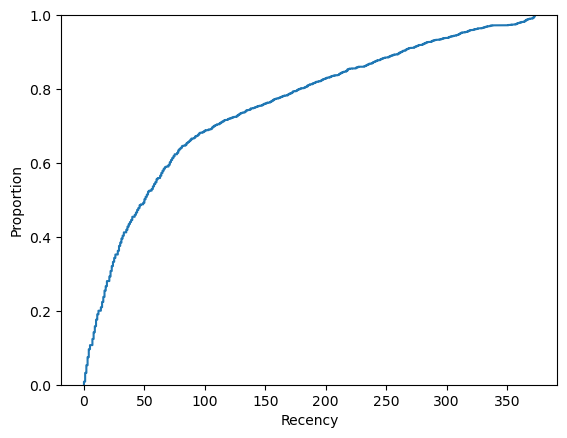

In [29]:
sns.ecdfplot(data=RFMScore['Recency'])

<AxesSubplot:xlabel='Frequency', ylabel='Proportion'>

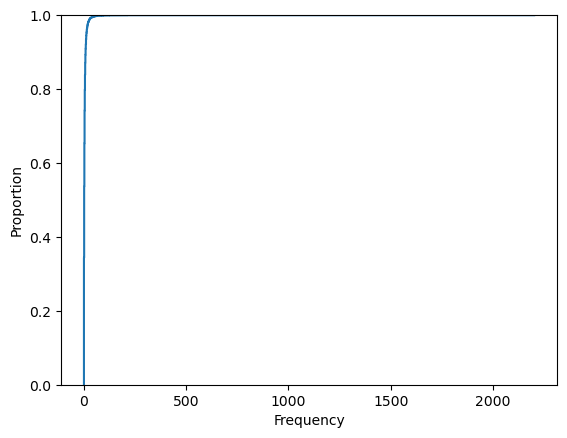

In [30]:
sns.ecdfplot(data=RFMScore['Frequency'])

<AxesSubplot:xlabel='Monetary', ylabel='Proportion'>

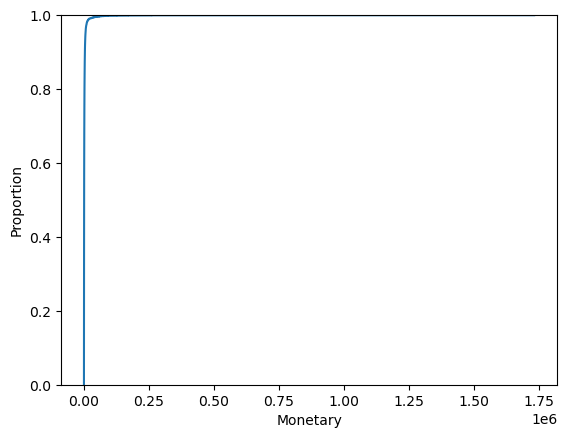

In [31]:
sns.ecdfplot(data=RFMScore['Monetary'])

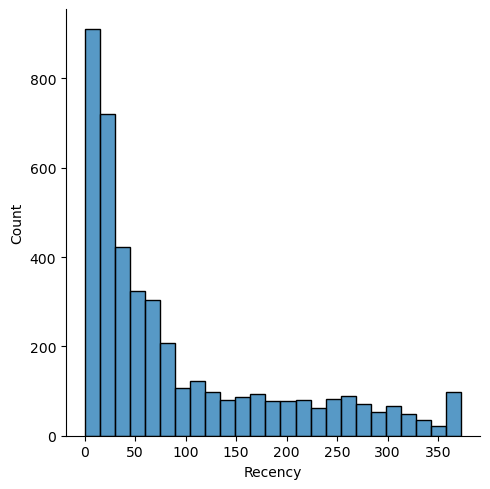

In [32]:
sns.displot(x=RFMScore['Recency'])

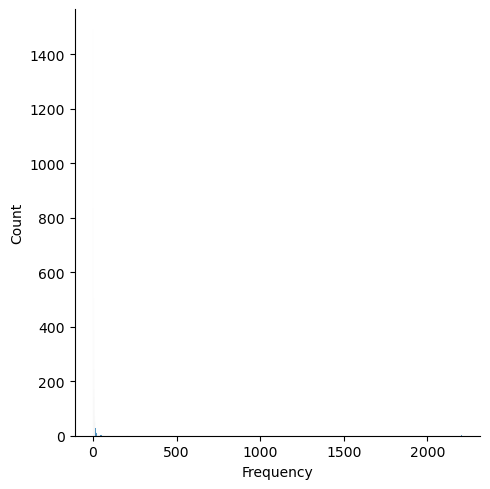

In [33]:
sns.displot(x=RFMScore['Frequency'])

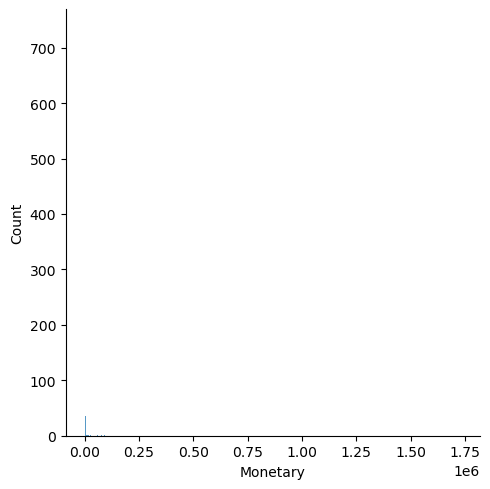

In [34]:
sns.displot(x=RFMScore['Monetary'])

In [35]:
RFMScore['Recency'].quantile(q=[0.39,0.50,0.75])

0.39     31.00
0.50     50.00
0.75    141.25
Name: Recency, dtype: float64

In [36]:
RFMScore['Frequency'].quantile(q=[0.75,0.95,0.99])

0.75     5.0
0.95    13.0
0.99    30.0
Name: Frequency, dtype: float64

In [37]:
RFMScore['Monetary'].quantile(q=[0.75,0.95,0.99])

0.75     1661.9500
0.95     5871.1565
0.99    20134.7537
Name: Monetary, dtype: float64

In [38]:
RFMScore.describe()

,CustomerID,Recency,Frequency,Monetary
count,4340.000000,4340.000000,4340.000000,4.340000e+03
mean,15299.934030,92.020276,4.785714,2.452664e+03
std,1721.691336,100.005992,34.272832,2.777147e+04
min,12346.000000,0.000000,1.000000,0.000000e+00
25%,13812.750000,17.000000,1.000000,3.073225e+02
50%,15298.500000,50.000000,2.000000,6.744850e+02
75%,16778.250000,141.250000,5.000000,1.661950e+03
max,18287.000000,373.000000,2204.000000,1.733153e+06


In [39]:
quantile100=RFMScore.quantile(q=[0.39,0.56,0.72])#Recency
quantile200=RFMScore.quantile(q=[0.75,0.94,0.977,0.995])#Frequency
quantile300=RFMScore.quantile(q=[0.62,0.80,0.938,0.9915,0.9985])#Monetary

In [40]:
quantile100  #so quantile100 is a DataFrame

,CustomerID,Recency,Frequency,Monetary
0.39,14649.42,31.00,2.0,473.0221
0.56,15651.84,63.00,3.0,813.9232
0.72,16610.08,120.08,4.0,1474.0808


# Function for R,F,M scoring

In [41]:
def RScoring(x,d,p):
    if x<=d[p][0.39]:
        return 4
    elif x<=d[p][0.56]:
        return 3
    elif x<=d[p][0.72]:
        return 2
    else:
        return 1
    

In [42]:
def FScoring(x,p,d):
    if x<=d[p][0.75]:
        return 1
    elif x<=d[p][0.94]:
        return 2
    elif x<=d[p][0.977]:
        return 3
    elif x<=d[p][0.995]:
        return 4
    else:
        return 5
    

In [43]:
def MScoring(x,p,d):
    if x<=d[p][0.62]:
        return 1
    elif x<=d[p][0.80]:
        return 2
    elif x<=d[p][0.938]:
        return 3
    elif x<=d[p][0.9915]:
        return 4
    else:
        return 5
 

Calculating RFM score of each customer by applying respective score function

In [44]:
RFMScore["R"]=RFMScore["Recency"].apply(RScoring,args=(quantile100,"Recency"))   
RFMScore["F"]=RFMScore["Frequency"].apply(FScoring,args=("Frequency" ,quantile200))
RFMScore["M"]=RFMScore["Monetary"].apply(MScoring,args=("Monetary" ,quantile300))

Function arguments for RScoring: x-RFMScore["Recency"] ;  d - dataframe of RScoring ; p - "Recency" column

In [45]:
RFMScore.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M
0,12346.0,325,1,77183.60,1,1,5
1,12347.0,2,7,4310.00,4,2,3
2,12348.0,75,4,1797.24,2,1,2
3,12349.0,18,1,1757.55,4,1,2
4,12350.0,310,1,334.40,1,1,1


In [46]:
#Finding sum of R,F,M Score
RFMScore["RFM_sum"]=RFMScore[["R","F","M"]].sum(axis=1)
RFMScore.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_sum
0,12346.0,325,1,77183.60,1,1,5,7
1,12347.0,2,7,4310.00,4,2,3,9
2,12348.0,75,4,1797.24,2,1,2,5
3,12349.0,18,1,1757.55,4,1,2,7
4,12350.0,310,1,334.40,1,1,1,3


In [47]:
RFMScore.RFM_sum.value_counts() #Customer segmentation can be done for 3 to 14 RFM_sum

3     1056
6      890
5      613
4      557
7      377
8      284
9      276
10     117
11      80
12      60
14      17
13      13
Name: RFM_sum, dtype: int64

In [48]:
#Doing segmentation by assigning loyality type to each customer
loyality_label=["Silver","Gold","Diamond","Platinum"]  # 0-4 silver, 5-6 Gold, 7-10 Diamond, 10+ Platinum
RFMScore["RFM_sum"].quantile(q=[0.25,0.70,0.95])

0.25     4.0
0.70     6.0
0.95    10.0
Name: RFM_sum, dtype: float64

In [49]:
quantile500=RFMScore["RFM_sum"].quantile(q=[0.25,0.70,0.95])
def loyality(x,d,p):
    if x<=4:
        return 'Silver'
    elif x<=6:
        return 'Gold'
    elif x<=10:
        return 'Diamond'
    else:
        return 'Platinum'

In [50]:
RFMScore["RFM_loyality"]=RFMScore["RFM_sum"].apply(loyality,args=(quantile500,"RFM_sum")) 

In [51]:
RFMScore["RFM_loyality"].value_counts()

Silver      1613
Gold        1503
Diamond     1054
Platinum     170
Name: RFM_loyality, dtype: int64

We can also apply qcut function to divide into 4 equal parts
score_cuts=pd.qcut(RFMScore.RFM_sum,q=4,labels=loyality_label)
RFMScore["RFM_loyality"]=score_cuts.values

In [52]:
RFMScore.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_sum,RFM_loyality
0,12346.0,325,1,77183.60,1,1,5,7,Diamond
1,12347.0,2,7,4310.00,4,2,3,9,Diamond
2,12348.0,75,4,1797.24,2,1,2,5,Gold
3,12349.0,18,1,1757.55,4,1,2,7,Diamond
4,12350.0,310,1,334.40,1,1,1,3,Silver


<AxesSubplot:xlabel='Frequency', ylabel='RFM_sum'>

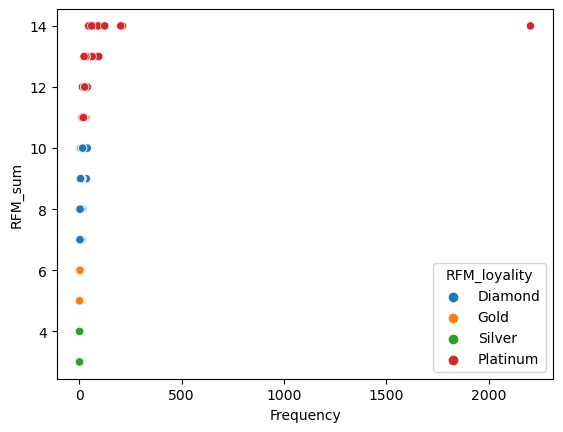

In [53]:
#Visualization 
sns.scatterplot(data=RFMScore,x="Frequency",y="RFM_sum",hue="RFM_loyality")

<AxesSubplot:xlabel='Monetary', ylabel='RFM_sum'>

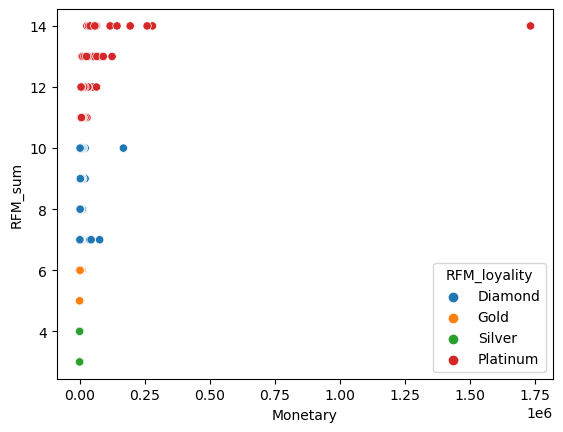

In [54]:
sns.scatterplot(data=RFMScore,x="Monetary",y="RFM_sum",hue="RFM_loyality")

<AxesSubplot:xlabel='Recency', ylabel='RFM_sum'>

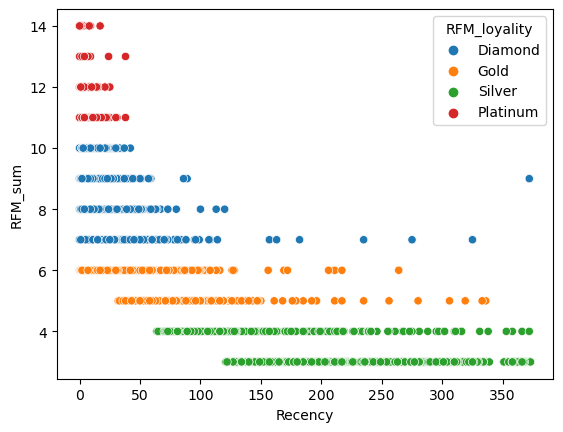

In [55]:
sns.scatterplot(data=RFMScore,x="Recency",y="RFM_sum",hue="RFM_loyality")

In [56]:
#Creating RFM_id by combining R,F,M score instead of adding

In [57]:
RFMScore["RFM_ID"]=RFMScore.R.map(str)+RFMScore.F.map(str)+RFMScore.M.map(str)
RFMScore.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_sum,RFM_loyality,RFM_ID
0,12346.0,325,1,77183.60,1,1,5,7,Diamond,115
1,12347.0,2,7,4310.00,4,2,3,9,Diamond,423
2,12348.0,75,4,1797.24,2,1,2,5,Gold,212
3,12349.0,18,1,1757.55,4,1,2,7,Diamond,412
4,12350.0,310,1,334.40,1,1,1,3,Silver,111


Customer Segment descriptions:
1. Inactive or Passerby customers - Customers who are not after anything in particular. only buy what might catch their attention.
2. Promising or Loyal customers - Customers who shop regularly and love this shopping mall
3. New customers - Customers who enjoy their last visit to shop and may come back if they find out more about what this mall has to offer
4. Out-of-town customers or sleeping - They were once loyal customers, but they move to new place and find a closer shopping mall
5. Students - Customers who visit the store often but they dont spend much
6. Can't loose or Dissatisfied customers - They spend a lot on shopping, but the previous purchase didnt suit them
7. Nurture or Soon-to-be loyal customers - They are 'soon-to-be' loyal customers if the previous purchase suited them and the mall catches their attention

In [58]:
#regex for customer segmentation by using RFM ID
seg_map={
    r'[1][1-2][2-3]':"Inactive or Passerby customers ",
    r'[1-2][1-3][3]':"at-Risk",
    r'[1-2][1-5][3-5]':"cant_lose",
    r'[1][1-4][2-4]':"about_to_sleep",
    r'[3][3][3]':"need_attention",
    r'[3-5][3-5][3-5]':"promising",
    r'[1-2][1-5][1-2]':"new customer",
    r'[3-5][[1-5][1-2]':'students',
    r'[3-5][[1-3][1-2]':'Nurture',
    r'[3-5][[1-2][3-5]': 'Drive_Loyality',
    }

RFMScore["Segment"]=RFMScore["RFM_ID"].replace(seg_map,regex=True)
RFMScore['Segment'].value_counts()


students                           1709
new customer                       1655
Drive_Loyality                      515
promising                           229
Inactive or Passerby customers      144
at-Risk                              67
cant_lose                            19
need_attention                        2
Name: Segment, dtype: int64

In [59]:
RFMScore.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_sum,RFM_loyality,RFM_ID,Segment
0,12346.0,325,1,77183.60,1,1,5,7,Diamond,115,cant_lose
1,12347.0,2,7,4310.00,4,2,3,9,Diamond,423,Drive_Loyality
2,12348.0,75,4,1797.24,2,1,2,5,Gold,212,new customer
3,12349.0,18,1,1757.55,4,1,2,7,Diamond,412,students
4,12350.0,310,1,334.40,1,1,1,3,Silver,111,new customer


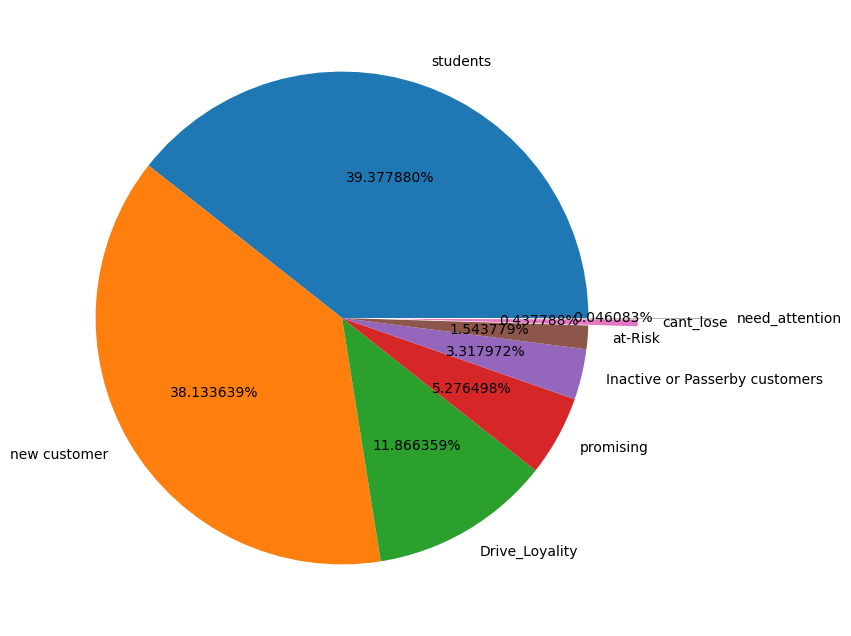

In [60]:
plt.figure(figsize=(14,8))
plt.pie(RFMScore.Segment.value_counts(),explode=(0,0,0,0,0,0,0.2,0.5),labels=RFMScore.Segment.value_counts().index,autopct="%2f%%")
plt.show()

In [61]:
#Using KMeans Algorithm 
Newdata=RFMScore["RFM_sum"]
Newdata
pd.DataFrame(Newdata)

,RFM_sum
0,7
1,9
2,5
3,7
4,3
...,...
4335,3
4336,3
4337,6
4338,10


Finding the appropriate cluster number by applying the k-means algorithm- Elbow Method

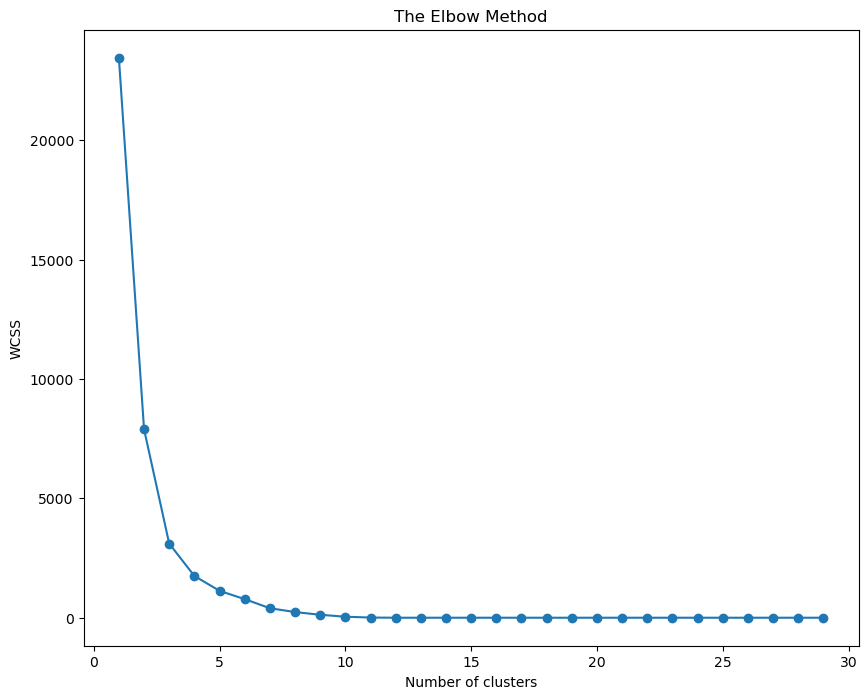

In [62]:
plt.figure(figsize=(10, 8))
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 30):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(pd.DataFrame(Newdata))
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 30), wcss,marker="o")
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [63]:
#!pip install yellowbrick

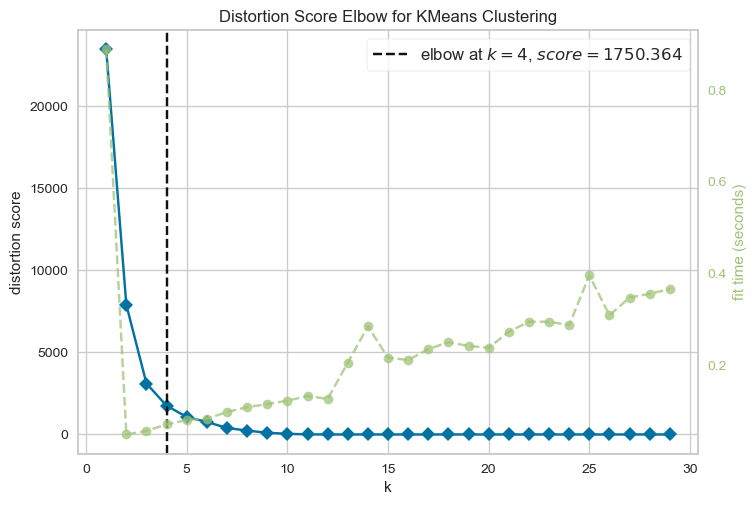

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [64]:
# install yellowbrick package
from yellowbrick.cluster import KElbowVisualizer
model=KMeans()
visualizer=KElbowVisualizer(model,k=(1,30)).fit(pd.DataFrame(Newdata))
visualizer.show()

In [65]:
# Fitting data using KMeans algorithm----K=4
kmeans=KMeans(n_clusters=4,init="k-means++",max_iter=100,random_state=101)
y_kmeans=kmeans.fit_predict(pd.DataFrame(Newdata))
y_kmeans

array([1, 1, 3, ..., 3, 2, 3])

In [66]:
RFMScore["Cluster"]=kmeans.labels_
RFMScore.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_sum,RFM_loyality,RFM_ID,Segment,Cluster
0,12346.0,325,1,77183.60,1,1,5,7,Diamond,115,cant_lose,1
1,12347.0,2,7,4310.00,4,2,3,9,Diamond,423,Drive_Loyality,1
2,12348.0,75,4,1797.24,2,1,2,5,Gold,212,new customer,3
3,12349.0,18,1,1757.55,4,1,2,7,Diamond,412,students,1
4,12350.0,310,1,334.40,1,1,1,3,Silver,111,new customer,0


In [67]:
RFMScore["Cluster"].value_counts()

0    1613
3    1503
1     937
2     287
Name: Cluster, dtype: int64

In [68]:
RFMScore["RFM_loyality"].value_counts()

Silver      1613
Gold        1503
Diamond     1054
Platinum     170
Name: RFM_loyality, dtype: int64

In [69]:
#Evaluating the cluster

labels=kmeans.labels_

from sklearn.metrics import silhouette_score

print(silhouette_score(pd.DataFrame(Newdata),labels))
#we find the very good silhoutte score so clustering is effective

0.6854691777739286


# 2: Segment (Group/Cluster) Identify trends for Day, Month, Season, Time by Invoice count

Now we are going to analize -
1.when is the sales highest (month/season/day/timing)
2.when is the rush hour (month/season/day)
3.when the rush as per timing (morning,afternoon,evening) as per day(weekday/weekend)
4.Monthly sales trend

In [70]:
df2.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Total
0,536365,6,2010-12-01 08:26:00,2.55,17850.0,15.30
1,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34
2,536365,8,2010-12-01 08:26:00,2.75,17850.0,22.00
3,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34
4,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34


In [71]:
df2.shape

(531285, 6)

In [72]:
# Extration of day,month,hour from invoicedate
import datetime as dt
df2["Day"]=df2["InvoiceDate"].dt.day_name()
df2["Month"]=df2["InvoiceDate"].dt.month
df2["Hour"]=df2["InvoiceDate"].dt.hour

In [73]:
df2.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Total,Day,Month,Hour
0,536365,6,2010-12-01 08:26:00,2.55,17850.0,15.30,Wednesday,12,8
1,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34,Wednesday,12,8
2,536365,8,2010-12-01 08:26:00,2.75,17850.0,22.00,Wednesday,12,8
3,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34,Wednesday,12,8
4,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34,Wednesday,12,8


# Function to create season and timing column

In [74]:
# Deriving season
def cal_season(x):
    if x in [11,12,1,2]:
        return 'Winter'
    elif x in [3,4,5]:
        return 'Summer'
    elif x in [6,7,8]:
        return 'Monsoon'
    else:
        return 'Post Monsoon'

In [75]:
# Deriving timing
def cal_timing(x):
    if x in range(0,5):
        return 'Early Morning(0:00 - 4:00 Hours)'
    elif x in range(5,11):
        return 'Morning(5:00 - 11:00 Hours)'
    elif x in range(11,16):
        return 'Afternoon(11:00 - 17:00 Hours)'
    elif x in range(17,24):
        return 'Evening(17:00-20:00 Hours)'
    else :
        return 'Night(20:00-00:00 Hours)'

In [76]:
df2['season'] = df2['Month'].apply(cal_season)
df2['Timing'] = df2['Hour'].apply(cal_timing)

In [77]:
df2.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Total,Day,Month,Hour,season,Timing
0,536365,6,2010-12-01 08:26:00,2.55,17850.0,15.30,Wednesday,12,8,Winter,Morning(5:00 - 11:00 Hours)
1,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34,Wednesday,12,8,Winter,Morning(5:00 - 11:00 Hours)
2,536365,8,2010-12-01 08:26:00,2.75,17850.0,22.00,Wednesday,12,8,Winter,Morning(5:00 - 11:00 Hours)
3,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34,Wednesday,12,8,Winter,Morning(5:00 - 11:00 Hours)
4,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34,Wednesday,12,8,Winter,Morning(5:00 - 11:00 Hours)


In [78]:
df2['Month'] = df2['InvoiceDate'].dt.month_name()
df2['weekend']=np.where((df2['Day']=='Saturday')|(df2['Day']=='Sunday'),'Yes',"No")

In [79]:
df2.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Total,Day,Month,Hour,season,Timing,weekend
0,536365,6,2010-12-01 08:26:00,2.55,17850.0,15.30,Wednesday,December,8,Winter,Morning(5:00 - 11:00 Hours),No
1,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34,Wednesday,December,8,Winter,Morning(5:00 - 11:00 Hours),No
2,536365,8,2010-12-01 08:26:00,2.75,17850.0,22.00,Wednesday,December,8,Winter,Morning(5:00 - 11:00 Hours),No
3,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34,Wednesday,December,8,Winter,Morning(5:00 - 11:00 Hours),No
4,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34,Wednesday,December,8,Winter,Morning(5:00 - 11:00 Hours),No


# Analyzing rush hour i.e total number of invoice is more

In [80]:
day_count = df2.groupby('Day')['InvoiceNo'].count().to_frame('count_of_invoices').reset_index()
day_count
#Thers is no sale on saturday so we can conclude that Mall is closed on every Saturday

,Day,count_of_invoices
0,Friday,80483
1,Monday,93308
2,Sunday,63910
3,Thursday,101221
4,Tuesday,99804
5,Wednesday,92559


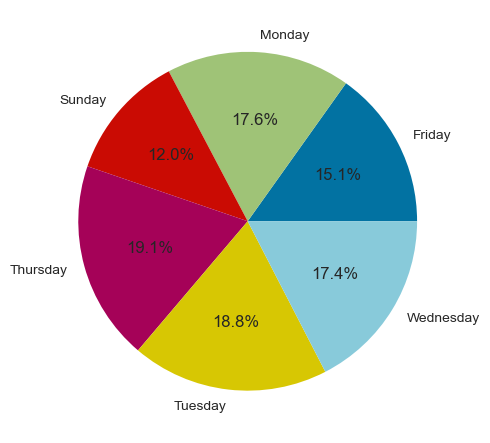

In [81]:
plt.pie(day_count.count_of_invoices,labels=day_count['Day'],autopct='%.1f%%')
plt.show()

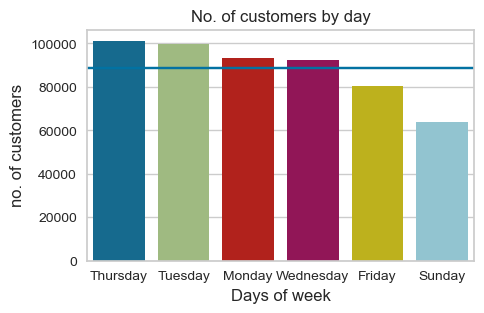

In [82]:
# plot number of customers by day graph
day=df2["Day"].value_counts()
plt.figure(figsize=(5,3))
sns.barplot(day.index,day.values)
#plot the average blue line
plt.axhline(y=day.mean())
plt.title("No. of customers by day")
plt.ylabel("no. of customers",fontsize=12)
plt.xlabel("Days of week",fontsize=12)
plt.show()

In [83]:
#hour_count = df2.groupby('Timing')['InvoiceNo'].agg(["count"]).sort_values(by="count",ascending=False)
#hour_count
hour_count = df2.groupby('Timing')['InvoiceNo'].count().to_frame('count_of_invoices').reset_index()
hour_count

,Timing,count_of_invoices
0,Afternoon(11:00 - 17:00 Hours),347317
1,Evening(17:00-20:00 Hours),39682
2,Morning(5:00 - 11:00 Hours),90835
3,Night(20:00-00:00 Hours),53451


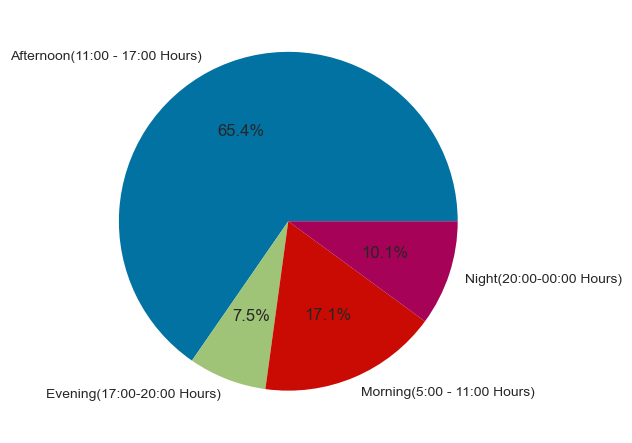

In [84]:
plt.pie(hour_count.count_of_invoices,labels=hour_count['Timing'],autopct='%.1f%%')
plt.show()

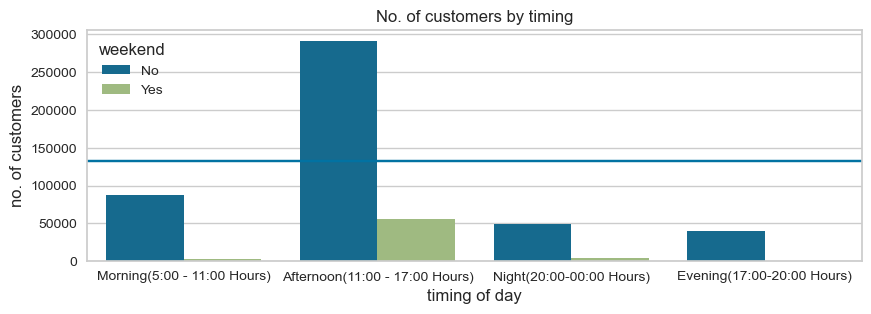

In [85]:
# plot number of customers by timing-weekend graph
timing=df2["Timing"].value_counts()
plt.figure(figsize=(10,3))
sns.countplot(x=df2['Timing'],hue=df2['weekend'])
#plot the average customers line
plt.axhline(y=timing.mean())
plt.title("No. of customers by timing")
plt.ylabel("no. of customers",fontsize=12)
plt.xlabel("timing of day",fontsize=12)
plt.show()

In [86]:
#month_count = df2.groupby('Month')['InvoiceNo'].agg(["count"]).sort_values(by="count",ascending=False)
#month_count
month_count = df2.groupby('Month')['InvoiceNo'].count().to_frame('count_of_invoices').reset_index()
month_count

,Month,count_of_invoices
0,April,29171
1,August,34566
2,December,66818
3,February,27184
4,January,34350
5,July,38716
6,June,36056
7,March,35915
8,May,36292
9,November,83498


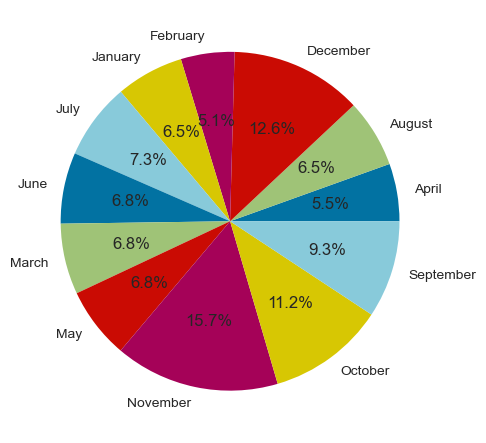

In [87]:
plt.pie(month_count.count_of_invoices,labels=month_count['Month'],autopct='%.1f%%')
plt.show()

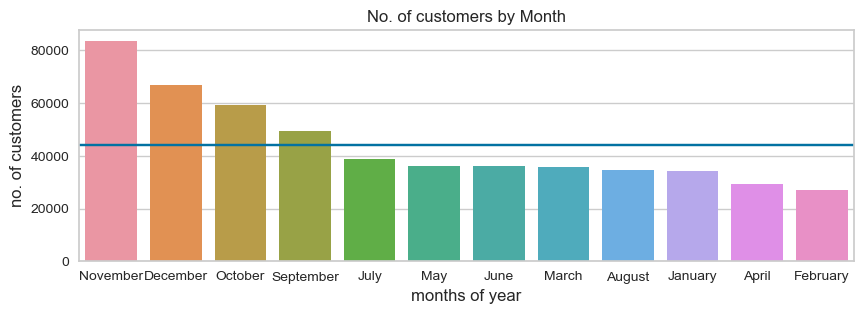

In [88]:
# plot number of customers by month graph
Month=df2["Month"].value_counts()
plt.figure(figsize=(10,3))
sns.barplot(Month.index,Month.values)
#plot the average 
plt.axhline(y=Month.mean())
plt.title("No. of customers by Month")
plt.ylabel("no. of customers",fontsize=12)
plt.xlabel("months of year",fontsize=12)
plt.show()

In [89]:
#season_count = df2.groupby('season')['InvoiceNo'].agg(["count"]).sort_values(by="count",ascending=False)
#season_count
season_count = df2.groupby('season')['InvoiceNo'].count().to_frame('count_of_invoices')
season_count.reset_index(inplace=True)
season_count

,season,count_of_invoices
0,Monsoon,109338
1,Post Monsoon,108719
2,Summer,101378
3,Winter,211850


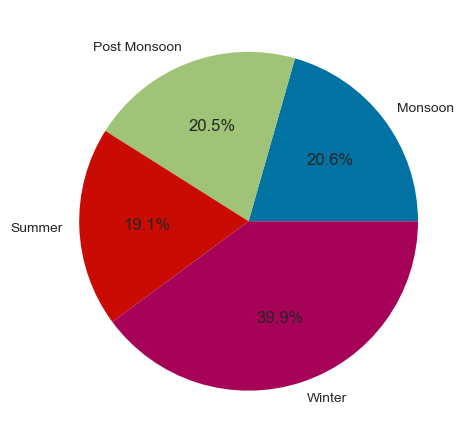

In [90]:
plt.pie(season_count.count_of_invoices,labels=season_count['season'],autopct='%.1f%%')
plt.show()

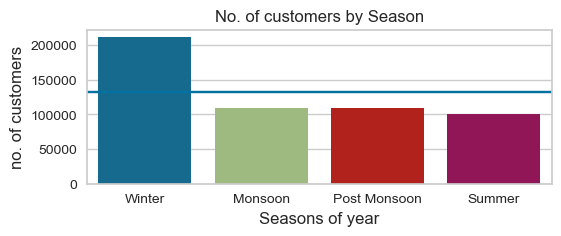

In [91]:
# plot number of customers by month graph
season=df2["season"].value_counts()
plt.figure(figsize=(6,2))
sns.barplot(season.index,season.values)
#plot the average line 
plt.axhline(y=season.mean())
plt.title("No. of customers by Season")
plt.ylabel("no. of customers",fontsize=12)
plt.xlabel("Seasons of year",fontsize=12)
plt.show()

In [92]:
weekend_count = df2.groupby('weekend')['InvoiceNo'].agg(["count"]).sort_values(by="count",ascending=False)
weekend_count

,count
weekend,
No,467375
Yes,63910


# Now analysing Total Sales

In [93]:
day_sales = df2.groupby('Day')['Total'].sum().to_frame('Total_sales').sort_values(by = 'Total_sales', ascending = False).reset_index()
day_sales

,Day,Total_sales
0,Thursday,2203161.240
1,Tuesday,2178632.611
2,Wednesday,1851147.810
3,Friday,1818216.111
4,Monday,1779575.041
5,Sunday,813827.611


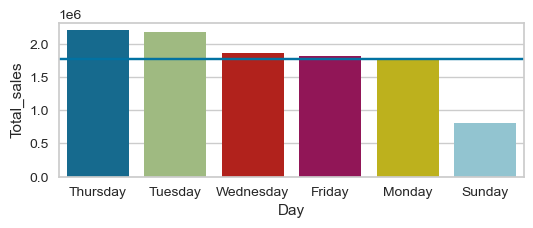

In [94]:
fig, ax = plt.subplots(figsize=(6,2))
sns.barplot(data=day_sales, x="Day", y="Total_sales")
#plot the average sale
plt.axhline(y=day_sales['Total_sales'].mean())

1.On Thursday and Tuesday sales are high.
2.Wednesday,Friday and Monday sales are equally average.
3.Sunday sales are lowest. This shows people don't like to shop on weekend or sunday.
4.There is no sale on saturday so we can conclude that mall is closed on every Saturday.

In [95]:
month_sales = df2.groupby('Month')['Total'].sum().to_frame('Total_sales').sort_values(by = 'Total_sales', ascending = False).reset_index()
month_sales

,Month,Total_sales
0,November,1509496.330
1,December,1462538.820
2,October,1154979.300
3,September,1058590.172
4,May,770536.020
5,June,761739.900
6,August,737014.260
7,July,719221.191
8,March,717639.360
9,January,691364.560


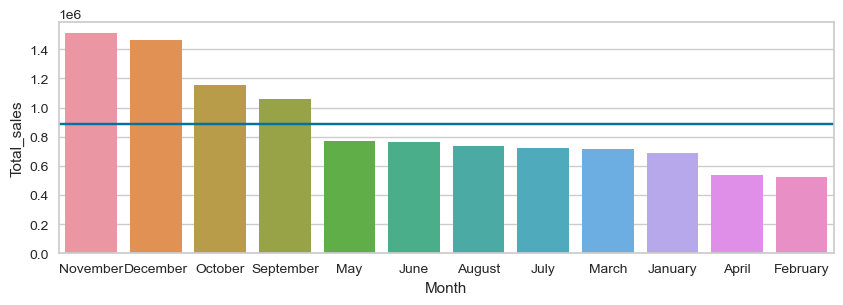

In [96]:
fig, ax = plt.subplots(figsize=(10,3))
sns.barplot(data=month_sales, x="Month", y="Total_sales")
#plot the average sale
plt.axhline(y=month_sales['Total_sales'].mean())

1.From September to Decenber sales are high, November is having highest sales.
2.April and February are having lowest sales and rest months are having average sales.

In [97]:
season_sales = df2.groupby('season')['Total'].sum().to_frame('Total_sales').sort_values(by = 'Total_sales', ascending = False).reset_index()
season_sales

,season,Total_sales
0,Winter,4187031.600
1,Monsoon,2217975.351
2,Post Monsoon,2213569.472
3,Summer,2025984.001


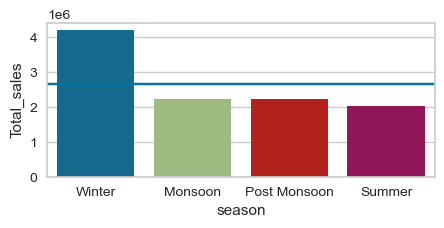

In [98]:
fig, ax = plt.subplots(figsize=(5,2))
sns.barplot(data=season_sales, x="season", y="Total_sales")
#plot the average sale
plt.axhline(y=season_sales['Total_sales'].mean())

1.Winter sales are the highest, may be due to festive season of Christmas.

In [99]:
Timing_sales = df2.groupby('Timing')['Total'].sum().to_frame('Total_sales').reset_index().sort_values(by = 'Total_sales', ascending = False)
Timing_sales

,Timing,Total_sales
0,Afternoon(11:00 - 17:00 Hours),6462597.051
2,Morning(5:00 - 11:00 Hours),2751942.502
3,Night(20:00-00:00 Hours),754006.560
1,Evening(17:00-20:00 Hours),676014.311


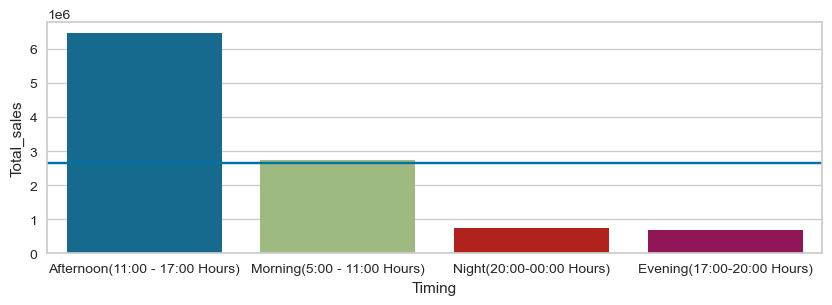

In [100]:
fig, ax = plt.subplots(figsize=(10,3))
sns.barplot(data=Timing_sales, x="Timing", y="Total_sales")
#plot the average sale
plt.axhline(y=Timing_sales['Total_sales'].mean())

1.People mostly like to shop in afternoon and on average in morning time.
2.At night and evening time people prefer to rest and relax than shopping

# Sales trends

<AxesSubplot:xlabel='Month_Year'>

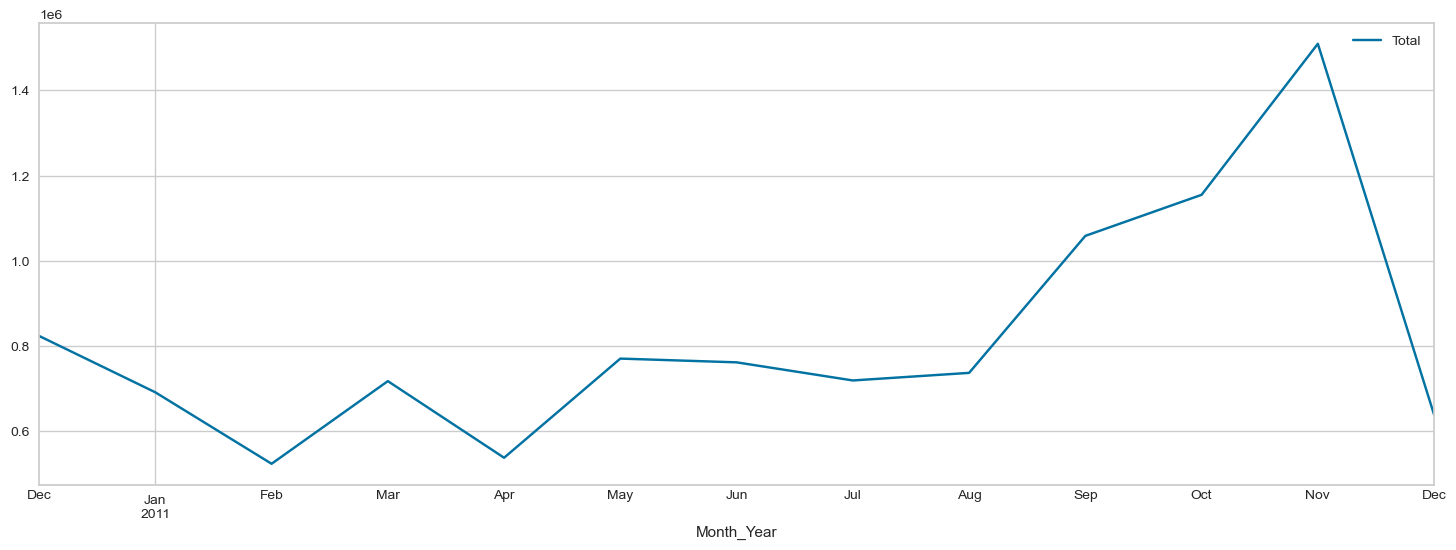

In [101]:
df2['Month_Year'] = df2['InvoiceDate'].dt.to_period('M')
sales = df2.groupby(['Month_Year']).sum()
sales[['Total']].plot(figsize=(18, 6))

1.Sales is in increasing trend
2.In November it is the highest.

# 3.Top 10 selling product 

In [102]:
df1.head()

,InvoiceNo,StockCode,lower,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [103]:
df1.shape

(541909, 9)

In [104]:
df_top=df1.copy()
df_top=df_top.drop(['lower','CustomerID'],axis=1)

In [105]:
# Finding the Total Sale by multiplying the Quantity and Unit Price
df_top['Total']=df_top['Quantity']*df_top['UnitPrice']
df_top.drop(['UnitPrice'],axis=1,inplace=True)
df_top.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Country,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,United Kingdom,20.34


In [106]:
#Finding the Overall Sale of a Product using Pivot Table
df_top_table=df_top.pivot_table(values='Total',index=['Description'],aggfunc='sum',sort=True).reset_index()
df_top_table.head()

,Description,Total
0,20713,0.00
1,4 PURPLE FLOCK DINNER CANDLES,290.80
2,50'S CHRISTMAS GIFT BAG LARGE,2341.13
3,DOLLY GIRL BEAKER,2882.50
4,I LOVE LONDON MINI BACKPACK,1628.17


In [107]:
#Extracting top 10 rows by sorting the 'Total' column in descending order
df_top_table.sort_values(by='Total',ascending=False).head(10)

,Description,Total
1098,DOTCOM POSTAGE,206245.48
2915,REGENCY CAKESTAND 3 TIER,164762.19
3918,WHITE HANGING HEART T-LIGHT HOLDER,99668.47
2471,PARTY BUNTING,98302.98
1866,JUMBO BAG RED RETROSPOT,92356.03
2803,RABBIT NIGHT LIGHT,66756.59
2753,POSTAGE,66230.64
2439,PAPER CHAIN KIT 50'S CHRISTMAS,63791.94
244,ASSORTED COLOUR BIRD ORNAMENT,58959.73
773,CHILLI LIGHTS,53768.06


In [108]:
#We can also use groupby function 
df_top.groupby('Description').sum().reset_index().sort_values(by='Total',ascending=False).head(10)

,Description,Quantity,Total
1098,DOTCOM POSTAGE,707,206245.48
2915,REGENCY CAKESTAND 3 TIER,13033,164762.19
3918,WHITE HANGING HEART T-LIGHT HOLDER,35317,99668.47
2471,PARTY BUNTING,18022,98302.98
1866,JUMBO BAG RED RETROSPOT,47363,92356.03
2803,RABBIT NIGHT LIGHT,30680,66756.59
2753,POSTAGE,3003,66230.64
2439,PAPER CHAIN KIT 50'S CHRISTMAS,18902,63791.94
244,ASSORTED COLOUR BIRD ORNAMENT,36381,58959.73
773,CHILLI LIGHTS,10229,53768.06


In [109]:
#Now we can groupby top ten items purchased high in quantity.
df_top.groupby('Description').sum().reset_index().sort_values(by='Quantity',ascending=False).head(10)

,Description,Quantity,Total
4009,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847,13587.93
1866,JUMBO BAG RED RETROSPOT,47363,92356.03
244,ASSORTED COLOUR BIRD ORNAMENT,36381,58959.73
2740,POPCORN HOLDER,36334,33969.46
2395,PACK OF 72 RETROSPOT CAKE CASES,36039,21059.72
3918,WHITE HANGING HEART T-LIGHT HOLDER,35317,99668.47
2803,RABBIT NIGHT LIGHT,30680,66756.59
2161,MINI PAINT SET VINTAGE,26437,16810.42
2361,PACK OF 12 LONDON TISSUES,26315,7972.76
2393,PACK OF 60 PINK PAISLEY CAKE CASES,24753,12189.47


In [110]:
#we can see the stock items returned,damaged etc most
df_top.groupby('Description').sum().reset_index().sort_values(by='Quantity').head(10)

,Description,Quantity,Total
4167,printing smudges/thrown away,-19200,0.0
3740,"Unsaleable, destroyed.",-15644,0.0
4116,check,-12030,0.0
2796,Printing smudges/thrown away,-9058,0.0
1123,Damaged,-7540,0.0
4194,throw away,-5368,0.0
4126,damages,-4338,0.0
4147,incorrect stock entry.,-4320,0.0
4195,thrown away,-4110,0.0
4219,wrongly marked. 23343 in box,-3100,0.0


Most Selling product in the mall is 'DotCom Postage' as per Total Sale amount
As per qty ,'WORLD WAR 2 GLIDERS ASSTD DESIGNS' is most sale product
Most returned product is 'printing smudges/thrown away'

# 4 Best product at country level.

Now we are going to find the highest selling items countrywise.
For this first we will group by country and find the product with highest selling value of each country

In [111]:
df4=df_top.pivot_table(values='Total',index=['Country','Description'],aggfunc='sum',sort=False).reset_index()
df4.head()

,Country,Description,Total
0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,93953.07
1,United Kingdom,WHITE METAL LANTERN,7684.25
2,United Kingdom,CREAM CUPID HEARTS COAT HANGER,5379.17
3,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,15779.79
4,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,21013.43


In [112]:
# After identifying the sales of each product at a country level, picking the highest sale value by grouping
df_Cntry=df4.groupby(by='Country').max()
df_Cntry=df_Cntry.reset_index()
df_Cntry.head()

,Country,Total
0,Australia,3375.84
1,Austria,1456.00
2,Bahrain,120.00
3,Belgium,4248.00
4,Brazil,175.20


Now to get the description of the maximum ssale value product countrywise with description -
First we will add one more column of primay key in both tables df_country and df4 then merge df_country with df4 
to identify the Prodcut name(description) on basis of the Sale and Country Value


In [113]:
# Creating a column 'Primary key' by merging two columns for the initial table
df_Cntry['Primary']=df_Cntry['Country']+' '+(df_Cntry['Total'].map(str))  
df_Cntry.head(10)

,Country,Total,Primary
0,Australia,3375.84,Australia 3375.84
1,Austria,1456.00,Austria 1456.0
2,Bahrain,120.00,Bahrain 120.0
3,Belgium,4248.00,Belgium 4248.0
4,Brazil,175.20,Brazil 175.2
5,Canada,550.94,Canada 550.94
6,Channel Islands,517.80,Channel Islands 517.8
7,Cyprus,580.00,Cyprus 580.0
8,Czech Republic,70.80,Czech Republic 70.80000000000001
9,Denmark,734.40,Denmark 734.4000000000001


In [114]:
# Creating a coloumn 'Primary key' by merging two columns for the initial table
df4['Primary']=df4['Country']+' '+(df4['Total'].map(str))
df4.head()

,Country,Description,Total,Primary
0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,93953.07,United Kingdom 93953.07
1,United Kingdom,WHITE METAL LANTERN,7684.25,United Kingdom 7684.25
2,United Kingdom,CREAM CUPID HEARTS COAT HANGER,5379.17,United Kingdom 5379.17
3,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,15779.79,United Kingdom 15779.79
4,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,21013.43,United Kingdom 21013.43


In [115]:
# Merging these two tables using left join
df_mrg=df_Cntry.merge(df4,how='left',on='Primary')
df_mrg.head()

,Country_x,Total_x,Primary,Country_y,Description,Total_y
0,Australia,3375.84,Australia 3375.84,Australia,RABBIT NIGHT LIGHT,3375.84
1,Austria,1456.00,Austria 1456.0,Austria,POSTAGE,1456.00
2,Bahrain,120.00,Bahrain 120.0,Bahrain,ICE CREAM SUNDAE LIP GLOSS,120.00
3,Belgium,4248.00,Belgium 4248.0,Belgium,POSTAGE,4248.00
4,Brazil,175.20,Brazil 175.2,Brazil,REGENCY CAKESTAND 3 TIER,175.20


In [116]:
# Extract the final table from df_mrg and rename the columns showcasing the best product at country level
df_Cntry_prd=df_mrg[['Country_x','Description','Total_x']]
df_Cntry_prd.rename(columns={'Country_x':'Country','Total_x':'Total_Sales'},inplace=True)
df_Cntry_prd.sort_values(by='Total_Sales',ascending =False)

,Country,Description,Total_Sales
38,United Kingdom,DOTCOM POSTAGE,206245.48
14,Germany,POSTAGE,20821.00
13,France,POSTAGE,15065.00
24,Netherlands,RABBIT NIGHT LIGHT,9568.48
10,EIRE,REGENCY CAKESTAND 3 TIER,7442.85
20,Japan,RABBIT NIGHT LIGHT,6087.79
33,Spain,POSTAGE,5852.00
3,Belgium,POSTAGE,4248.00
35,Switzerland,POSTAGE,3880.00
12,Finland,POSTAGE,3472.00


So we can see that the best product at country level.
DOTCOM POSTAGE of sales value 206245.48 being the costiest item of UK.

Now identifing the Top 10 Country with the product of highest sales value

In [117]:
Cn_sale= df4.groupby(['Country']).agg(Sum_of_Sales=('Total','sum')).sort_values(by = 'Sum_of_Sales', ascending = False).reset_index()
Cn_sale

,Country,Sum_of_Sales
0,United Kingdom,8187806.364
1,Netherlands,284661.540
2,EIRE,263276.820
3,Germany,221698.210
4,France,197403.900
5,Australia,137077.270
6,Switzerland,56385.350
7,Spain,54774.580
8,Belgium,40910.960
9,Sweden,36595.910


<AxesSubplot:xlabel='Country', ylabel='Sum_of_Sales'>

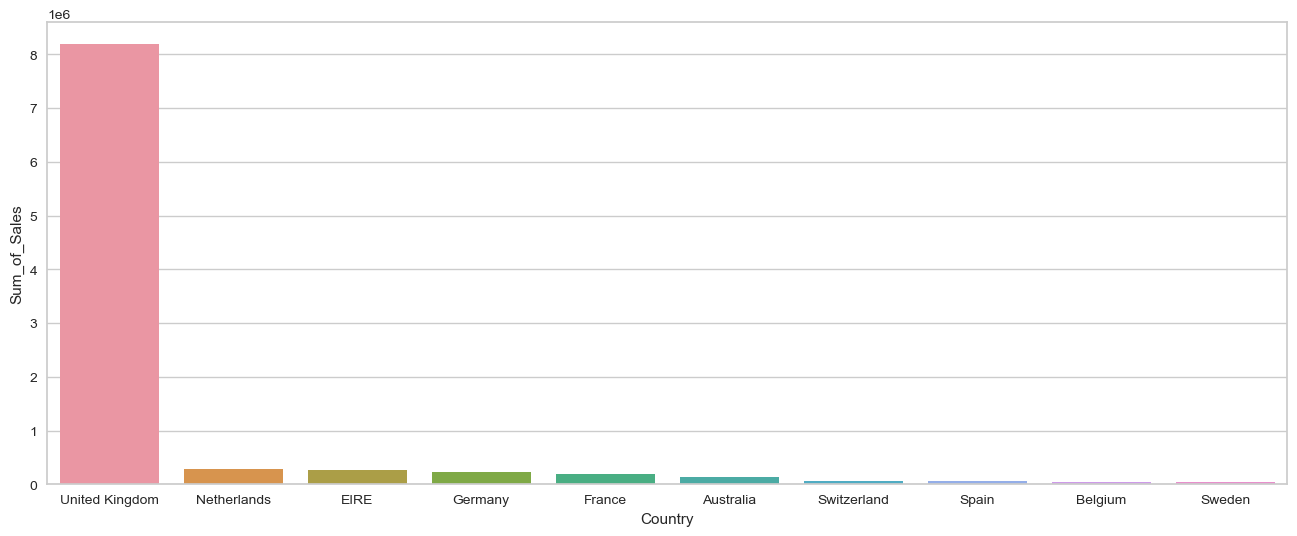

In [118]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.barplot(data=Cn_sale.head(10), x="Country", y="Sum_of_Sales")

UK has very large sale compared to other countries and 'DOTCOM POSTAGE' is the most sold product in UK

# 5 FINDING CUSTOMER VALUATION - CLTV


For customer evaluation we can think the problem statement as a regression problem.

Customer Life time value(CLTV) is a quantitative analysis and 
one of the most important metric to modern customer centric business senario.

Customer Lifetime Value is the amount of monetary value a customer
will bring to your company during their lifetime, from the first 
to the last purchase. In other words, it is a number that represents 
the total amount spent by a single customer on your products 
or services over their lifespan.

Customer Lifetime Value (CLTV) is the average revenue you can generate from customers over the entire lifetime of their account. 

Based on that specific number, you will have a better sense of how much 
you can spend on customer acquisition, how much you should invest into 
your existing customers, and you can define strategies and a budget 
to increase your Customer Lifetime Value in eCommerce or retain your 
high-value customers.

In [119]:
dfcltv=df2[['InvoiceNo','Quantity','InvoiceDate','UnitPrice','CustomerID','Total']]
dfcltv.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Total
0,536365,6,2010-12-01 08:26:00,2.55,17850.0,15.30
1,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34
2,536365,8,2010-12-01 08:26:00,2.75,17850.0,22.00
3,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34
4,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34


# CLTV= Average Total Order value * Purchases Frequency / Churn Rate


For CLTV we need to calculate 3 things of each customer
1.Average Total Order value = Monetary/Frequency i.e. Total shopping done/No. of orders placed
2.Average Purchases per year or Purchase Frequency
3.Churn rate

In [120]:
#For finding Average Total Order value we can use RFMScore table
RFMScore.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_sum,RFM_loyality,RFM_ID,Segment,Cluster
0,12346.0,325,1,77183.60,1,1,5,7,Diamond,115,cant_lose,1
1,12347.0,2,7,4310.00,4,2,3,9,Diamond,423,Drive_Loyality,1
2,12348.0,75,4,1797.24,2,1,2,5,Gold,212,new customer,3
3,12349.0,18,1,1757.55,4,1,2,7,Diamond,412,students,1
4,12350.0,310,1,334.40,1,1,1,3,Silver,111,new customer,0


In [121]:
# AVERAGE ORDER VALUE

RFMScore["avg_order_value"]=RFMScore["Monetary"]/RFMScore["Frequency"]
RFMScore.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_sum,RFM_loyality,RFM_ID,Segment,Cluster,avg_order_value
0,12346.0,325,1,77183.60,1,1,5,7,Diamond,115,cant_lose,1,77183.600000
1,12347.0,2,7,4310.00,4,2,3,9,Diamond,423,Drive_Loyality,1,615.714286
2,12348.0,75,4,1797.24,2,1,2,5,Gold,212,new customer,3,449.310000
3,12349.0,18,1,1757.55,4,1,2,7,Diamond,412,students,1,1757.550000
4,12350.0,310,1,334.40,1,1,1,3,Silver,111,new customer,0,334.400000


In ecommerce, companies are battling for attention, customers, and loyalty.
They typically adopt two broad strategic approaches-
1. Customer Acquisition
2. Customer Retention
However, customer acquisition is costly — around five times more than customer retention on average. 

# Repeat Purchase Rate


The repeat purchase rate is the first place to start when you decide to focus more time and energy on existing customers.
The repeat purchase rate (or repeat customer rate), is a metric that calculates the ratio of repeat customers to the overall customer base
This metric is essential because it tells you how poorly or successfully your customer retention strategies are performing.
The retention rate does not consider new customers so it is different from customerretention rate.

Repeat Purchase Rate = The no of customers completed 2 or more purchases during a given time frame / The total number of customers who bought from your company in the same period 

In [122]:
RFMScore[RFMScore["Frequency"]>1].shape[0]

2848

In [123]:
RFMScore.shape[0]

4340

In [124]:
#Repeat Rate
repeat_rate=RFMScore[RFMScore["Frequency"]>1].shape[0]/RFMScore.shape[0] #shape[0] gives the no of customers
repeat_rate

0.656221198156682

# Purchase Frequency

Customer purchase frequency = Total Number of orders ÷ Total Number of unique customers

If you know how frequently customers are coming back to make purchases, 
you’ll have a good understanding of your success at converting customers into repeat clients, 
helping you to make decisions about your customer retention strategy. 

In [125]:
sum(RFMScore["Frequency"])

20770

In [126]:
RFMScore.shape[0]

4340

In [127]:
#Purchase Frquency
purchase_frequency=sum(RFMScore["Frequency"])/RFMScore.shape[0]
purchase_frequency

4.785714285714286

# Churn Rate

eCommerce churn is the term used to describe the number of customers who stop buying from your online store.
The churn rate is the percentage of customers who stop doing business with you over a predetermined period. 
The important thing is that your churn rate remains as low as possible and doesn’t exceed your growth rate.

In [128]:
#ChurnRate
churn_rate=1-repeat_rate
churn_rate

0.343778801843318

In [129]:
purchase_frequency,repeat_rate,churn_rate

(4.785714285714286, 0.656221198156682, 0.343778801843318)

In [132]:
#customer value
RFMScore["CLTV"]=RFMScore["avg_order_value"]*purchase_frequency/churn_rate
RFMScore.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_sum,RFM_loyality,RFM_ID,Segment,Cluster,avg_order_value,CLTV
0,12346.0,325,1,77183.60,1,1,5,7,Diamond,115,cant_lose,1,77183.600000,1.074466e+06
1,12347.0,2,7,4310.00,4,2,3,9,Diamond,423,Drive_Loyality,1,615.714286,8.571304e+03
2,12348.0,75,4,1797.24,2,1,2,5,Gold,212,new customer,3,449.310000,6.254805e+03
3,12349.0,18,1,1757.55,4,1,2,7,Diamond,412,students,1,1757.550000,2.446670e+04
4,12350.0,310,1,334.40,1,1,1,3,Silver,111,new customer,0,334.400000,4.655153e+03


# Returns on customer lifetime = CLTV

profit margin & CLTV
 Lets assume that business making 25% profit

In [136]:
#profit Margin
RFMScore["profit_margin"]=RFMScore["Monetary"]*0.25
RFMScore.head()


,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_sum,RFM_loyality,RFM_ID,Segment,Cluster,avg_order_value,CLTV,profit_margin
0,12346.0,325,1,77183.60,1,1,5,7,Diamond,115,cant_lose,1,77183.600000,1.074466e+06,19295.9000
1,12347.0,2,7,4310.00,4,2,3,9,Diamond,423,Drive_Loyality,1,615.714286,8.571304e+03,1077.5000
2,12348.0,75,4,1797.24,2,1,2,5,Gold,212,new customer,3,449.310000,6.254805e+03,449.3100
3,12349.0,18,1,1757.55,4,1,2,7,Diamond,412,students,1,1757.550000,2.446670e+04,439.3875
4,12350.0,310,1,334.40,1,1,1,3,Silver,111,new customer,0,334.400000,4.655153e+03,83.6000


In [137]:
# Returns on CUSTOMER LIFETIME VALUE
RFMScore["cust_lifetime_value"]=RFMScore["CLTV"]*RFMScore["profit_margin"]

In [141]:
RFMScore2=RFMScore[['CustomerID','Recency','Frequency','Monetary','avg_order_value','CLTV','profit_margin','cust_lifetime_value']]
RFMScore2.head()

,CustomerID,Recency,Frequency,Monetary,avg_order_value,CLTV,profit_margin,cust_lifetime_value
0,12346.0,325,1,77183.60,77183.600000,1.074466e+06,19295.9000,2.073279e+10
1,12347.0,2,7,4310.00,615.714286,8.571304e+03,1077.5000,9.235580e+06
2,12348.0,75,4,1797.24,449.310000,6.254805e+03,449.3100,2.810346e+06
3,12349.0,18,1,1757.55,1757.550000,2.446670e+04,439.3875,1.075036e+07
4,12350.0,310,1,334.40,334.400000,4.655153e+03,83.6000,3.891708e+05


# Building a Regression model

In [143]:
# creation of month year
dfcltv["month_yr"]=dfcltv["InvoiceDate"].apply(lambda x: x.strftime("%b-%Y"))# extract the month and year

dfcltv.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Total,month_yr
0,536365,6,2010-12-01 08:26:00,2.55,17850.0,15.30,Dec-2010
1,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34,Dec-2010
2,536365,8,2010-12-01 08:26:00,2.75,17850.0,22.00,Dec-2010
3,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34,Dec-2010
4,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34,Dec-2010


In [146]:
sale=dfcltv.pivot_table(index=["CustomerID"],columns=["month_yr"],values="Total",aggfunc="sum",fill_value=0).reset_index()
sale["CLV"]=sale.iloc[:,2:].sum(axis=1)# sum all the months sale


In [147]:
sale.head()

month_yr,CustomerID,Apr-2011,Aug-2011,Dec-2010,Dec-2011,Feb-2011,Jan-2011,Jul-2011,Jun-2011,Mar-2011,May-2011,Nov-2011,Oct-2011,Sep-2011,CLV
0,12346.0,0.00,0.00,0.00,0.00,0.0,77183.60,0.0,0.00,0.0,0.0,0.00,0.00,0.0,77183.60
1,12347.0,636.25,584.91,711.79,224.82,0.0,475.39,0.0,382.52,0.0,0.0,0.00,1294.32,0.0,3673.75
2,12348.0,367.00,0.00,892.80,0.00,0.0,227.44,0.0,0.00,0.0,0.0,0.00,0.00,310.0,1430.24
3,12349.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,1757.55,0.00,0.0,1757.55
4,12350.0,0.00,0.00,0.00,0.00,334.4,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.0,334.40


Now lets build a regression model for existing customers.
We need a set of dependent (Y) and independent variables (X). 
we shall take last six-month data as independent variables and 
total revenue over three years as a dependent variable.


In [148]:
X=sale[["Sep-2011","Aug-2011","Jul-2011","Dec-2011","Nov-2011","Oct-2011"]]
Y=sale["CLV"]

In [149]:
#SPLIT TRAINING AND TESTING
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 42)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)

Y_pred=lr.predict(X_test)


print(lr.intercept_)
print(lr.coef_)

-49.32124274323223
[0.9837198  2.43487669 2.44446529 1.02121234 2.08966068 1.62583706]


In [150]:
from sklearn import metrics

print("R-Square", metrics.r2_score(Y_test,Y_pred))
print("MAE",metrics.mean_absolute_error(Y_test,Y_pred))
print("MSE",metrics.mean_squared_error(Y_test,Y_pred))
print("RMSE",np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))

R-Square 0.9777690999899974
MAE 675.5374198721219
MSE 2120295.800197622
RMSE 1456.1235525179934


# when the model is deployed the ML algorithm helps to understand the patterns